# Programa Ingenias+ Data Science

Ya dijimos previamente que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En esta notebook vamos a cambiar el dataset utilizado, ya que necesitamos variables continuas. Utilizaremos el dataset `StudentPerformance`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<font size=5>  🚀 Procesamiento de datos 👩🏽‍💻</font>

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta_del_archivo = '/content/drive/My Drive/JUMP/Propuestas/Clase 13 - Transformación de datos II/StudentsPerformance.csv'

# df = pd.read_csv(ruta_del_archivo) # Importar el archivo CSV

In [ ]:
students = pd.read_csv(ruta_del_archivo)
students.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,7.2,72,74
1,female,group C,some college,standard,completed,6.9,90,88
2,female,group B,master's degree,standard,none,9.0,95,93
3,male,group A,associate's degree,free/reduced,none,4.7,57,44
4,male,group C,some college,standard,none,7.6,78,75


In [ ]:
students.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                    int64
writing score                    int64
dtype: object



---



---



#### FEATURE ENGNEERING

Podemos separar las variables numéricas de las categóricas.

**Trabajaremos con las variables numéricas** utilizando StandardScaler de scikit-learn


In [ ]:
############################### volvamos a nuestro ejemplo de la clase

In [ ]:
students.columns
# df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
students.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,6.608900,69.169000,68.054000
std,1.516308,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,5.700000,59.000000,57.750000
50%,6.600000,70.000000,69.000000
75%,7.700000,79.000000,79.000000
max,10.000000,100.000000,100.000000




---



---



## Re-escalado

Muchos algoritmos funcionan mejor normalizando sus variables
de entrada. Lo que en este caso significa comprimir o extender
los valores de la variable para que estén en un rango definido.
Sin embargo, una mala aplicación de la normalización o una
elección descuidada del método de normalización puede arruinar
los datos y, con ello, el análisis.

Se utilizan dos métodos: **MinMax Scaler**

**MinMaxScaler** es un método de reescalado que transforma los datos de manera que estén dentro de un rango específico, como (0, 1) por defecto o cualquier otro rango especificado por el usuario.

Toma el valor mínimo y máximo de los datos y reescala cada valor dentro del rango especificado.

Es útil cuando necesitamos que los datos estén dentro de un rango específico.

Tener en cuenta que si se reescala un atributo, quizás sea conveniente reescalar otro, debido a que estamos rompiendo la proporcionalidad de los datos.


**Ejemplo:** Supongamos que estamos analizando el desempeño de dos estudiantes en dos exámenes diferentes.

Uno de los exámenes tiene un rango de puntuación de 0 a 100, mientras que el otro tiene un rango de 0 a 1000.

Al reescalar ambos conjuntos de datos al mismo rango (por ejemplo, de 0 a 1), podríamos comparar más fácilmente el desempeño relativo de los estudiantes en ambos exámenes

**Ejemplo 2:**

Para poner diferentes magnitudes en una escala comparable, facilitando la interpretación y comparación.
Queremos analizar el rendimiento de diferentes equipos en un torneo deportivo. Cada equipo tiene un número diferente de puntos, goles marcados y partidos ganados. Al reescalar estos datos, podemos comparar fácilmente el rendimiento relativo de los equipos en términos de su desempeño general en el torneo.


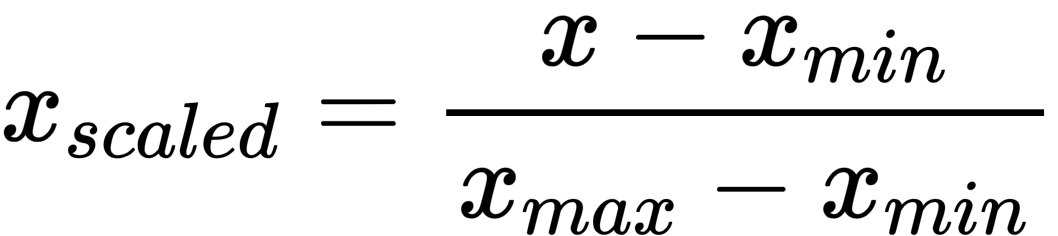

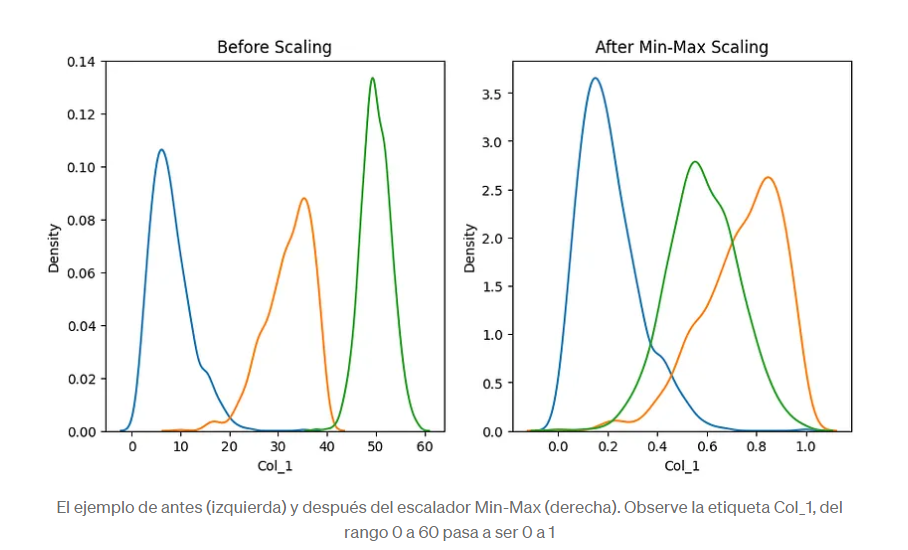

Podemos usar Min-Max Scaler cuando los datos tienen un rango acotado o cuando la distribución es normal y los datos no tienen valores atípicos. Por ejemplo, si sus datos contienen valores atípicos, escalar a un rango fijo como [0, 1] puede comprimir la mayoría de los puntos de datos, haciendo que los valores atípicos sean indistinguibles.

In [ ]:
#min_value = df['datos'].min()
#max_value = df['datos'].max()

# Reescalamos los datos
# df['datos_reescalados'] = (df['datos'] - min_value) / (max_value - min_value)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#  normalización de características mediante la técnica de escala mínima-máxima (o normalización en el rango)

In [ ]:
students1 = students.copy()

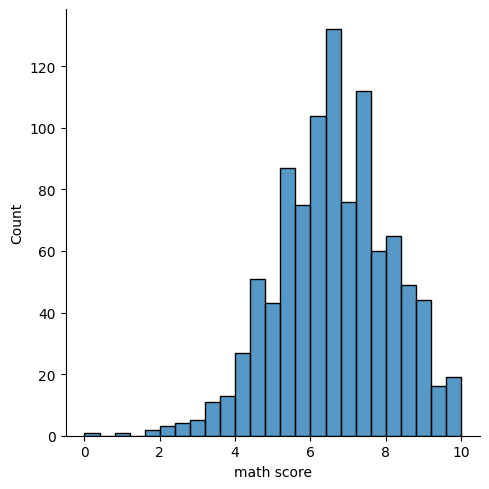

In [ ]:
sns.displot(students['math score']) # visualizacion

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
# se escala en el rango del 0 a 100
# copy=True --> se realiza una copia de los datos antes de la transformación

In [ ]:
students1['math score'] = scaler.fit_transform(students[['math score']])
# realiza la transformación de los datos de la columna 'math score' del df usando  elobjeto scaler de MinMaxScale

In [ ]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,7.2,72,74
1,female,group C,some college,standard,completed,6.9,90,88
2,female,group B,master's degree,standard,none,9.0,95,93
3,male,group A,associate's degree,free/reduced,none,4.7,57,44
4,male,group C,some college,standard,none,7.6,78,75


In [ ]:
students1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72,74
1,female,group C,some college,standard,completed,69.0,90,88
2,female,group B,master's degree,standard,none,90.0,95,93
3,male,group A,associate's degree,free/reduced,none,47.0,57,44
4,male,group C,some college,standard,none,76.0,78,75


In [ ]:
students1['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [ ]:
students['math score'].describe()

count    1000.000000
mean        6.608900
std         1.516308
min         0.000000
25%         5.700000
50%         6.600000
75%         7.700000
max        10.000000
Name: math score, dtype: float64

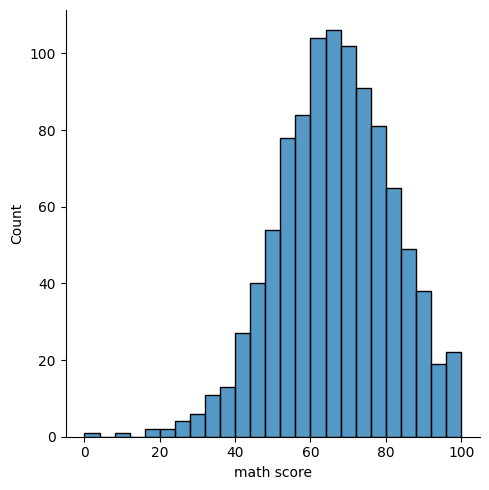

In [ ]:
sns.displot(students1['math score'])

In [ ]:
# Datos de ejemplo
edades = [[20], [30], [40], [50]]

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos y transformamos los datos
edades_escaladas = scaler.fit_transform(edades)

print("Edades escaladas:")
print(edades_escaladas)


Edades escaladas:
[[0.        ]
 [0.33333333]
 [0.66666667]
 [1.        ]]



MinMaxScaler
* Reescala los datos de manera que estén dentro de un rango específico, generalmente entre 0 y 1, aunque este rango puede ser especificado por nosotros
* Conserva la forma de la distribución original de los datos.
Es sensible a los valores atípicos, porque coloca los valores extremos en los límites del rango especificado.



---



---



## Estandarizacion




**¿Cómo se Realiza la Estandarización?**

Calcular la Media y la Desviación Estándar: Primero, se calcula la media (𝜇) y la desviación estándar (𝜎) de los datos originales.

Se aplica  la fórmula de Estandarización: cada valor en los datos originales se transforma utilizando la fórmula:

𝑋 estandarizado = 𝑋 − 𝜇 / 𝜎

* X es el valor original de la variable.
* 𝜇 es la media de la variable.
* 𝜎 es la desviación estándar de la variable.


**¿Porqué usamos la estandarización?**
* Comparación justa entre Variables: Al estandarizar, todas las variables tienen la misma escala, lo que facilita la comparación entre ellas.

* Mejorar el desempeño de Algoritmos: Algunos algoritmos de machine learning, como aquellos basados en gradientes o que utilizan la distancia entre puntos, pueden funcionar mejor o converger más rápido con datos estandarizados.


**Ejemplo:** Imaginemos que analizamos las alturas de una población. Al estandarizar los datos de altura, es posible comparar fácilmente cuántas desviaciones estándar está una persona por encima o por debajo de la altura media de la población, lo que nos da una idea de si una persona es más alta o más baja que la mayoría de las personas en términos relativos

**Ejemplo 2**
Para eliminar la influencia de la escala y la ubicación, centrándose en la variabilidad relativa de los datos.
Si consideramos un conjunto de datos que registra las temperaturas diarias en diferentes ciudades durante un año,  al estandarizarlos, se podria determinar qué ciudades experimentan fluctuaciones de temperatura más extremas en comparación con la temperatura promedio durante el año.

El **StandardScaler** es otro método de reescalado que transforma los datos de manera que tengan una media de 0 y una desviación estándar de 1.

Calcula la media y la desviación estándar de los datos y luego reescala cada valor de tal manera que estén centrados alrededor de cero y tengan una dispersión uniforme.

A cada dato se le resta la media de la variable y
se le divide por la desviación típica:

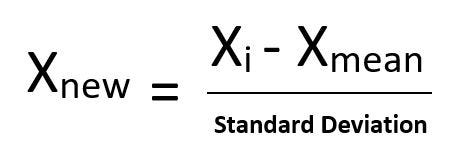

Si bien puede resultar conveniente en datos que no tienen distribución de probabilidad Gaussiana o Normal debido a que se puede trabajar mejor bajo ese esquema, tanto la media como la desviación típica son muy sensibles a outliers.

Es útil para algoritmos sensibles a la escala de las características, como aquellos basados en gradientes o que utilizan la distancia entre puntos.


In [ ]:
#mean_value = df['datos'].mean()
#std_value = df['datos'].std()

# Estandarizamos los datos
#df['datos_estandarizados'] = (df['datos'] - mean_value) / std_value

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ejemplo - como actua la estandarización de datos
data_ej = {'Feature_1': [10, 20, 30, 40, 50],
        'Feature_2': [2, 4, 6, 8, 10]}
df_ej = pd.DataFrame(data_ej)
print("Datos originales:")
print(df_ej)

# Creamos el objeto StandardScaler
scaler = StandardScaler()

# Ajustamos y transformamos los datos
df_estandarizado_ej = scaler.fit_transform(df_ej)

# Transformamos en df
df_estandarizado_ej = pd.DataFrame(df_estandarizado_ej, columns=df_ej.columns)
print("\nDatos estandarizados:")
print(df_estandarizado_ej)


Datos originales:
   Feature_1  Feature_2
0         10          2
1         20          4
2         30          6
3         40          8
4         50         10

Datos estandarizados:
   Feature_1  Feature_2
0  -1.414214  -1.414214
1  -0.707107  -0.707107
2   0.000000   0.000000
3   0.707107   0.707107
4   1.414214   1.414214


In [ ]:
from sklearn.preprocessing import StandardScaler

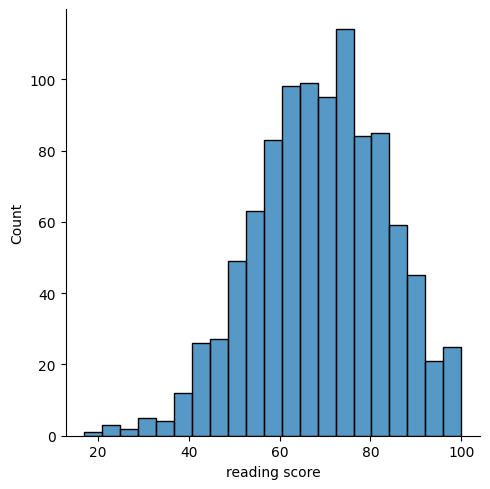

In [ ]:
sns.displot(students['reading score'])

In [ ]:
scaler = StandardScaler()

In [ ]:
students2 = students.copy()

In [ ]:
reading_scale = scaler.fit_transform(students2[['reading score']])

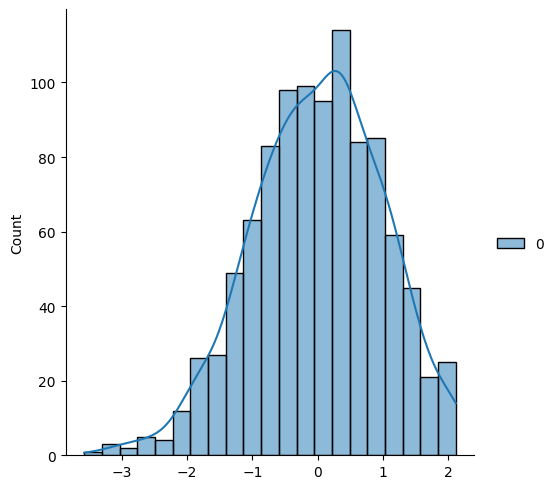

In [ ]:
sns.displot(reading_scale, kde=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Vamos a estandarizar solo las variables numéricas

# Seleccionamos de variables numéricas - podriamos seleccionar otras?
numeric_features = ['math score', 'reading score', 'writing score']
numeric_df = students[numeric_features]

# Creamos el objeto StandardScaler
scaler = StandardScaler()

# Ajustamos y transformamos las variables numéricas
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_features)
# acá estamos estandarizando nuestras variables
# fit_transform() es un método que ajusta el escalador a los datos y luego transforma esos datos
# En este caso, ajusta el escalador a numeric_df (df con solo las variables numéricas) y luego estandariza esas variable

students1 = students.copy()
students1.head(2)

# Combinamos las variables estandarizadas con las variables categóricas originales
# Eliminamos las variables numéricas del DataFrame original
students1.drop(columns=numeric_features, inplace=True)

# Concatenar las variables categóricas originales con las variables numéricas estandarizadas
students1 = pd.concat([students1, numeric_df_scaled], axis=1)

# Ahora 'students1' contiene todas las variables originales, pero las variables numéricas están estandarizadas
students1.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.390024,0.193999,0.391492
1,female,group C,some college,standard,completed,0.192076,1.427476,1.313269


In [ ]:
# Datos de ejemplo
puntajes = [[70], [80], [90], [100]]

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
puntajes_estandarizados = scaler.fit_transform(puntajes)

print("Puntajes estandarizados:")
print(puntajes_estandarizados)


Puntajes estandarizados:
[[-1.34164079]
 [-0.4472136 ]
 [ 0.4472136 ]
 [ 1.34164079]]




---



---



## Normalizacion


La normalización en ciencia de datos es un proceso utilizado para ajustar las características de un conjunto de datos para que tengan una escala común, generalmente entre 0 y 1 o -1 y 1. Esto se hace dividiendo cada valor de la característica por un valor específico, como la desviación estándar o el rango de los datos.

Cuando tenemos un conjunto de datos con características de diferentes magnitudes y queremos que todas estén en la misma escala.

**Ejemplo:**

Supongamos que estamos analizando datos de gastos mensuales de diferentes personas.

Al normalizar los datos, nos aseguramos de que las diferencias en los ingresos no influyan demasiado en las comparaciones entre los gastos de diferentes personas, lo que nos permitiría identificar patrones de gastos más fácilmente.

**Ejemplo 2:**
Para asegurarse de que diferentes características contribuyan de manera equitativa al análisis, independientemente de sus unidades o escalas originales.
Si estamos construyendo un modelo de recomendación de películas que tiene en cuenta la duración de la película, el presupuesto y la calificación de los críticos como características. Normalizar estas características aseguraría que todas ellas tengan el mismo peso en el modelo, independientemente de si la duración está en minutos, el presupuesto en dólares y la calificación en una escala del 1 al 10.

In [ ]:
#min_value = df['datos'].min()
#max_value = df['datos'].max()

# Normalizamos los datos
#df['datos_normalizados'] = (df['datos'] - min_value) / (max_value - min_value)

In [ ]:
from sklearn.preprocessing import Normalizer

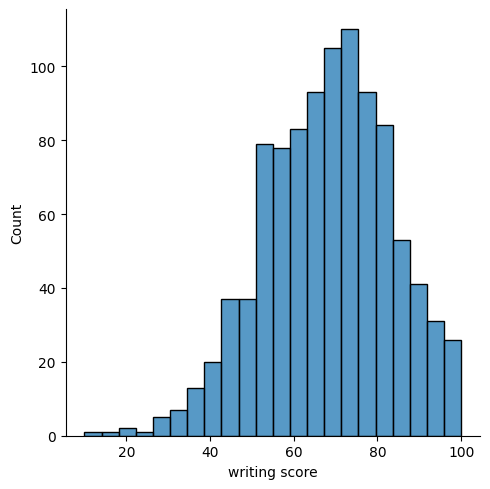

In [ ]:
sns.displot(students['writing score'])
# histograma de la distribución de las puntuaciones de escritura de los estudiantes
# como estan distribuidos los datos antes de la transformación

In [ ]:
normalizer = Normalizer() #  instancia de la clase Normalizer
normalizer.fit(students[['writing score']])
# Se ajusta el normalizador a los datos de puntuaciones de escritura de los estudiantes
# Esto calcula los parámetros necesarios para realizar la normalización:
# como las medias y desviaciones estándar de las características

Normalizer()

In [ ]:
normalizer.transform(students[['writing score']])
# se aplica la transformación de normalización a los datos de puntuaciones de escritura de los estudiantes

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
# Normalizer
normalizer = Normalizer()

# Ajustamos el Normalizer a variable de interés
normalizer.fit(students[['writing score']])

# Aplicamos la normalización a la variable
students['normalized_writing_score'] = normalizer.transform(students[['writing score']])

# Mostramos los valores numéricos antes de la normalización
print("Puntuación de escritura antes de la normalización:")
print(students['writing score'])

# Mostramos los valores numéricos después de la normalización
print("\nPuntuación de escritura normalizada:")
print(students['normalized_writing_score'])


Puntuación de escritura antes de la normalización:
0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing score, Length: 1000, dtype: int64

Puntuación de escritura normalizada:
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: normalized_writing_score, Length: 1000, dtype: float64


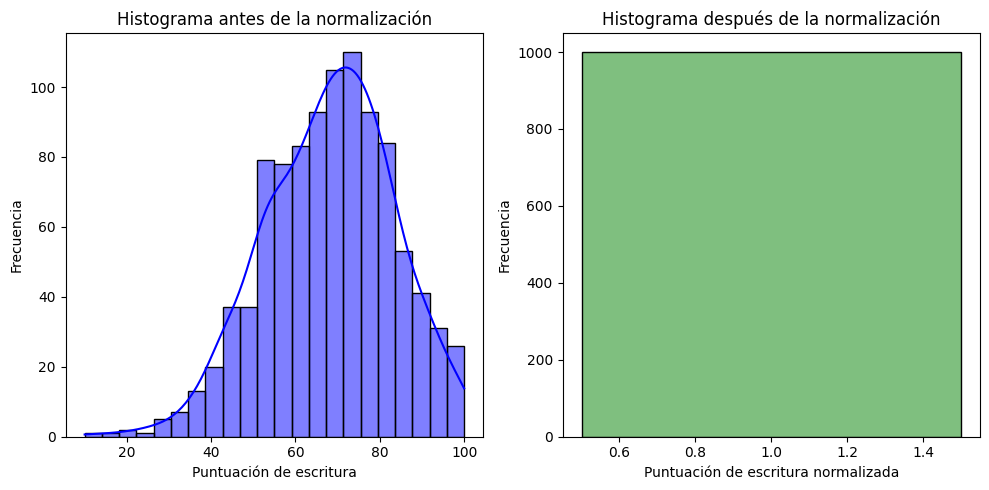

In [ ]:
# como vemos esto de forma gráfica?
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(students['writing score'], kde=True, color='blue')
plt.title('Histograma antes de la normalización')
plt.xlabel('Puntuación de escritura')
plt.ylabel('Frecuencia')

# Instancia del Normalizer
normalizer = Normalizer()

# Ajustamos el Normalizer a variable de interés
normalizer.fit(students[['writing score']])

# Aplicamos la normalización a la variable
students['normalized_writing_score'] = normalizer.transform(students[['writing score']])

# Histograma después de la normalización
plt.subplot(1, 2, 2) # ubicación
sns.histplot(students['normalized_writing_score'], kde=True, color='green')
plt.title('Histograma después de la normalización')
plt.xlabel('Puntuación de escritura normalizada')
plt.ylabel('Frecuencia')

# Gráficos
plt.tight_layout()
plt.show()

In [ ]:
# EJEMPLO

# datos ficticios de estudiantes
data = {
    'Matemáticas': [85, 72, 90, 60, 78],
    'Escritura': [50, 65, 80, 40, 75]
}
students_df = pd.DataFrame(data)

print("Datos de los estudiantes antes de la normalización:")
print(students_df)

# Objeto MinMaxScaler para normalizar los datos
scaler = MinMaxScaler()

# Normalización a los datos
normalized_data = scaler.fit_transform(students_df)

# Nuevo df con los datos normalizados
normalized_students_df = pd.DataFrame(normalized_data, columns=students_df.columns)

print("\nDatos de los estudiantes después de la normalización:")
print(normalized_students_df)



Datos de los estudiantes antes de la normalización:
   Matemáticas  Escritura
0           85         50
1           72         65
2           90         80
3           60         40
4           78         75

Datos de los estudiantes después de la normalización:
   Matemáticas  Escritura
0     0.833333      0.250
1     0.400000      0.625
2     1.000000      1.000
3     0.000000      0.000
4     0.600000      0.875


Otro ejemplo sería pensar en un conjunto de datos que contiene información sobre diferentes propiedades inmobiliarias: como el área de la casa, el número de habitaciones y el precio de venta. Y podemos querer normalizar estas características para que estén en la misma escala antes de usarlas en un modelo de regresión, por ejemplo



---



---



## Resumen

**MinMaxScaler:**
* Características: Escala los datos para que estén dentro de un rango específico, generalmente entre 0 y 1.
* Diferencias: Conserva la forma de la distribución original de los datos.

Ejemplo de problema: Clasificación de imágenes en blanco y negro.
* Descripción: estamos trabajando en un proyecto de clasificación de imágenes en blanco y negro,  cada píxel de la imagen tiene un valor entre 0 y 255 (escala de grises). Para que un modelo de aprendizaje automático funcione mejor, tendremos que escalar estos valores al rango [0, 1]. Usaríamos por ejemplo MinMaxScaler antes de entrenar el modelo.

Otros: fraudes financieros, reconocimiento de voz (amplitud y frecuencia), anomalias en el consumo de energia.  

**StandardScaler:**
* Características: Estandariza los datos para que tengan media 0 y desviación estándar 1.
* Diferencias: Centra los datos alrededor de 0 y puede cambiar la forma de la distribución original.

Ejemplo de problema: Predicción de precios de viviendas.
* Descripción: Estamos construyendo un modelo de regresión para predecir los precios de las viviendas. Nuestro conjunto de datos incluye características como el área de la casa, el número de habitaciones y la edad de la casa, que pueden tener diferentes escalas y distribuciones.
Usariamos StandardScaler para que las características tengan una media de 0 y una desviación estándar de 1 antes de entrenar el modelo de regresión.

Otros: datos biomedicos, marketing, etc.

**Normalizer:**
* Características: Normaliza los datos por fila, escalando cada fila de forma independiente a una longitud unitaria.
* Diferencias: No cambia la escala de los datos, pero los convierte en vectores unitarios.

Ejemplo de problema: Análisis de texto.
* Descripción: Ahora trabajamos en un proyecto de análisis de sentimientos de comentarios de redes sociales. Cada comentario es representado como un vector de frecuencia de palabras, donde cada entrada en el vector representa la frecuencia de una palabra en el comentario. Queremos que todos los vectores tengan la misma longitud unitaria para poder compararlos fácilmente.
Aqui podriamos usar Normalizer para normalizar cada vector de frecuencia de palabras a una longitud unitaria antes de realizar el análisis de sentimientos.

Otros: recomendación de peliculas, análisis de imágenes médicas, etc


Recordar que: **La elección del escalador depende del problema específico y de los requisitos del modelo.**

Es importante **comprender el problema** y las **características de los datos** antes de decidir qué tipo de escala aplicar



---



---



## BONUS

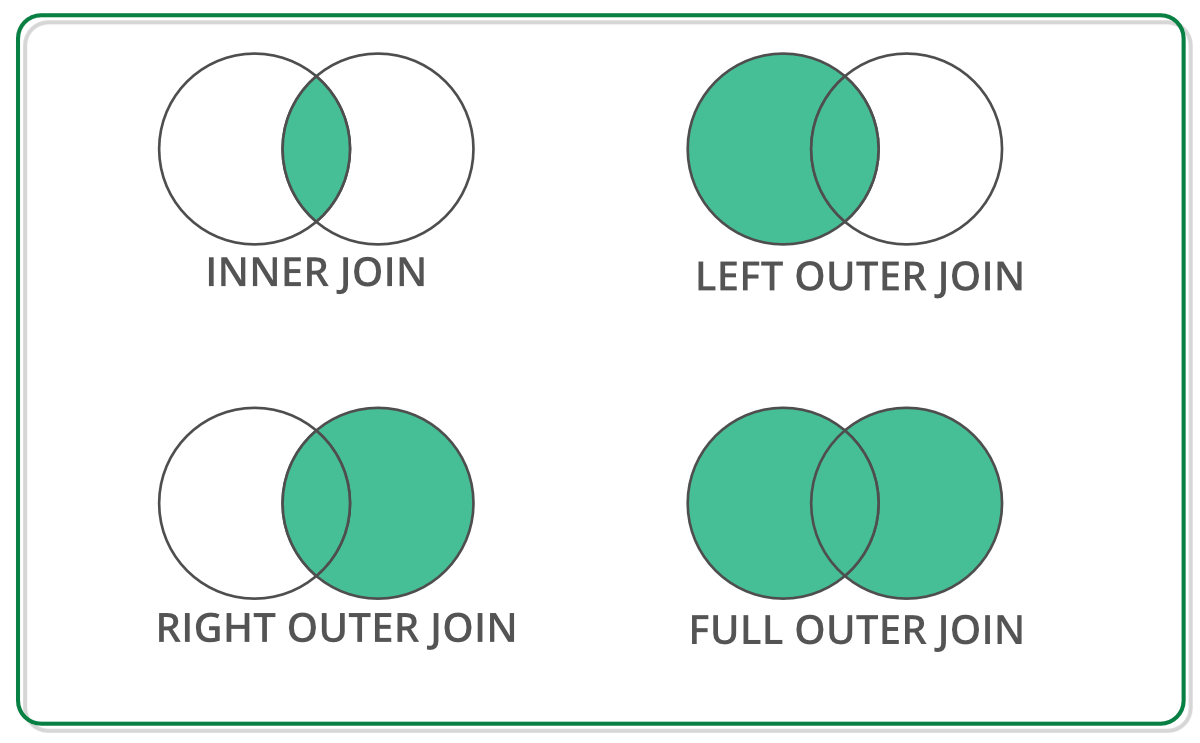

#### merge()

In [ ]:
import pandas as pd

# DataFrame 1
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Nombre': ['Juan', 'María', 'Pedro', 'Ana'],
    'Edad': [25, 30, 35, 40]
})

# df 2
df2 = pd.DataFrame({
    'ID': [1, 2, 5, 6],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Sevilla'],
    'Pais': ['España', 'España', 'España', 'España']
})

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)


DataFrame 1:
   ID Nombre  Edad
0   1   Juan    25
1   2  María    30
2   3  Pedro    35
3   4    Ana    40

DataFrame 2:
   ID     Ciudad    Pais
0   1     Madrid  España
1   2  Barcelona  España
2   5   Valencia  España
3   6    Sevilla  España


In [ ]:
merged_df_inner = pd.merge(df1, df2, on='ID', how='inner')
merged_df_inner
# Solo donde las claves coincidan en ambos

,ID,Nombre,Edad,Ciudad,Pais
0,1,Juan,25,Madrid,España
1,2,María,30,Barcelona,España


In [ ]:
merged_df_left = pd.merge(df1, df2, on='ID', how='left')
merged_df_left
# todos los registros de df1 y los coincidentes de df2
# Si no hay coincidencias en df2, se rellenarán con NaN

,ID,Nombre,Edad,Ciudad,Pais
0,1,Juan,25,Madrid,España
1,2,María,30,Barcelona,España
2,3,Pedro,35,NaN,NaN
3,4,Ana,40,NaN,NaN


In [ ]:
merged_df_right = pd.merge(df1, df2, on='ID', how='right')
merged_df_right
# todos los registros de df2 y los coincidentes de df1
# Si no hay coincidencias en df1, se rellenarán con NaN

,ID,Nombre,Edad,Ciudad,Pais
0,1,Juan,25.0,Madrid,España
1,2,María,30.0,Barcelona,España
2,5,NaN,NaN,Valencia,España
3,6,NaN,NaN,Sevilla,España


In [ ]:
merged_df_outer = pd.merge(df1, df2, on='ID', how='outer')
merged_df_outer
# une todos los registros de ambos df,
# rellenando con NaN en las celdas donde no haya coincidencias

,ID,Nombre,Edad,Ciudad,Pais
0,1,Juan,25.0,Madrid,España
1,2,María,30.0,Barcelona,España
2,3,Pedro,35.0,NaN,NaN
3,4,Ana,40.0,NaN,NaN
4,5,NaN,NaN,Valencia,España
5,6,NaN,NaN,Sevilla,España


#### concat()
Une (concatena) por defecto, a lo largo del eje de las filas.
Es útil para combinar df vertical u horizontalmente sin tener en cuenta las claves

In [ ]:
# Concatenar df verticalmente
concatenated_df = pd.concat([df1, df2])
concatenated_df


,ID,Nombre,Edad,Ciudad,Pais
0,1,Juan,25.0,NaN,NaN
1,2,María,30.0,NaN,NaN
2,3,Pedro,35.0,NaN,NaN
3,4,Ana,40.0,NaN,NaN
0,1,NaN,NaN,Madrid,España
1,2,NaN,NaN,Barcelona,España
2,5,NaN,NaN,Valencia,España
3,6,NaN,NaN,Sevilla,España


In [ ]:
# Concatenar df horizontalmente (a lo largo de las columnas)
concatenated_df2 = pd.concat([df1, df2], axis=1)
concatenated_df2

,ID,Nombre,Edad,ID,Ciudad,Pais
0,1,Juan,25,1,Madrid,España
1,2,María,30,2,Barcelona,España
2,3,Pedro,35,5,Valencia,España
3,4,Ana,40,6,Sevilla,España


In [ ]:
dataset_combinado = pd.concat(df1, df2, axis=0, join='outer', ignore_index=True)
dataset_combinado

#### join()
similar a merge(), pero en lugar de usar las columnas como claves, aplica los índices

In [ ]:
joined_df = df1.join(df2, lsuffix='_df1', rsuffix='_df2')
joined_df

,ID_df1,Nombre,Edad,ID_df2,Ciudad,Pais
0,1,Juan,25,1,Madrid,España
1,2,María,30,2,Barcelona,España
2,3,Pedro,35,5,Valencia,España
3,4,Ana,40,6,Sevilla,España


In [ ]:
df2_renamed = df2.rename(columns={'ID': 'ID_df2'}) # renombrar - o eliminar (drop)
joined_df2 = df1.join(df2_renamed) # sin sufijos
joined_df2

,ID,Nombre,Edad,ID_df2,Ciudad,Pais
0,1,Juan,25,1,Madrid,España
1,2,María,30,2,Barcelona,España
2,3,Pedro,35,5,Valencia,España
3,4,Ana,40,6,Sevilla,España


#### append()